C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4796\3528025902.py:15: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(gdf)


  (0, 0)	1.0
  (0, 1)	0.8183772842243433
  (0, 2)	0.732060845146077
  (0, 3)	0.7421067714626564
  (0, 5)	0.5933482450702814
  (0, 6)	0.3588807879052822
  (0, 7)	0.8012568914547686
  (0, 8)	0.40547232582946113
  (0, 9)	0.10231289934935006
  (0, 10)	0.5534174706713992
  (0, 11)	0.18423346502948668
  (0, 12)	0.3155293853850685
  (0, 13)	0.5337362569800206
  (0, 16)	0.1408308885519024
  (0, 23)	0.08557088140034808
  (0, 24)	0.08152480626952063
  (0, 27)	0.23208652467374002
  (0, 31)	0.36845279412605647
  (0, 72)	0.36612085643175396
  (0, 80)	0.2599172906022489
  (1, 0)	0.8183772842243433
  (1, 1)	1.0
  (1, 2)	0.7668160872280174
  (1, 3)	0.5879650227563609
  (1, 4)	0.019982127236586766
  :	:
  (123, 128)	0.4248363008492789
  (124, 124)	1.0
  (124, 127)	0.2674802783075454
  (124, 128)	0.19414767112543285
  (125, 49)	0.14546458848579313
  (125, 113)	0.1889761985312327
  (125, 114)	0.15034839904081942
  (125, 115)	0.4742249119388775
  (125, 122)	0.2608266072463973
  (125, 123)	0.43946890581139

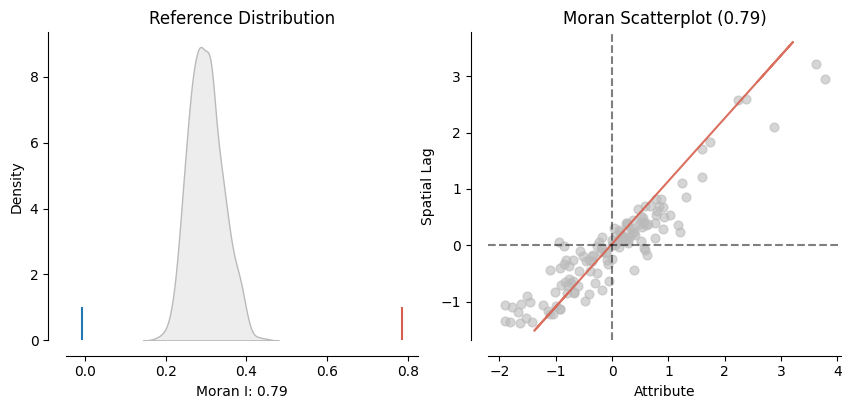

In [8]:
import geopandas as gpd
from pysal.explore import esda
from pysal.lib import weights
import matplotlib.pyplot as plt
from splot.esda import plot_moran
import numpy as np
import pandas as pd
from splot.esda import lisa_cluster

# 读取shapefile数据
shapefile_path = "D:\Lenovo\Desktop\云南大学\大创\复杂地形条件对空间关系构建的影响研究\data\构建权重矩阵示例数据\CTCI_墨卡托投影.shp"
gdf = gpd.read_file(shapefile_path)

# 创建空间权重矩阵
w = weights.Queen.from_dataframe(gdf)
w=weights.Kernel.from_dataframe(gdf)
print(w.sparse) # w.sparse为稀疏矩阵，它记录了非零元素的值和位置，未被显式记录的元素均为0
array=w.sparse.toarray()
print(type(array))
print(type(w.sparse))
# pd.DataFrame(array).to_csv('D:\Lenovo\Desktop\云南大学\大创\复杂地形条件对空间关系构建的影响研究\data\构建权重矩阵示例数据\\output.csv')


# weights.Queen.to_file(w,path="D:\Lenovo\Desktop\云南大学\大创\复杂地形条件对空间关系构建的影响研究\data\构建权重矩阵示例数据\\output_w.txt")
# 计算莫兰指数
moran = esda.Moran(gdf['CTCI'], w)


# 输出莫兰指数和p值
print('Moran\'s I:', moran.I)
print('P-value:', moran.p_sim)
print('Z-score:', moran.z_sim)



# 绘制莫兰散点图
plot_moran(moran, zstandard=True, figsize=(10, 4))
plt.show()

           name  loc_moran
0           五华区   0.140724
1           盘龙区   0.355692
2           官渡区   1.677198
3           西山区   0.848988
4           东川区   0.273769
..          ...        ...
124  贡山独龙族怒族自治县  11.553373
125  兰坪白族普米族自治县   3.169193
126       香格里拉市   2.725701
127         德钦县   6.085793
128    维西傈僳族自治县   5.700492

[129 rows x 2 columns]


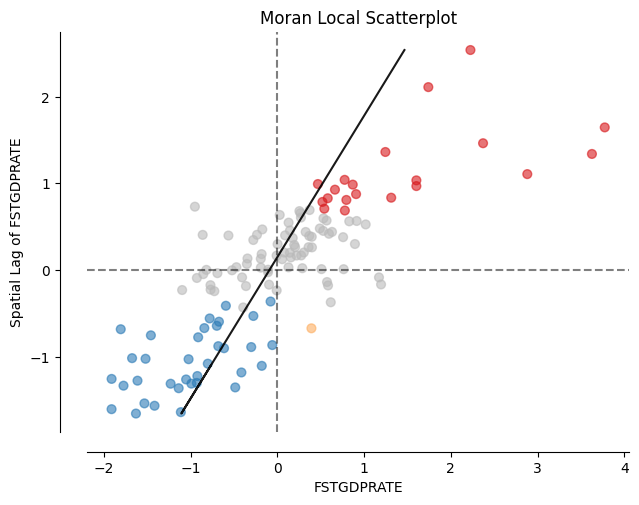

In [9]:
from splot.esda import moran_scatterplot

# 局部莫兰指数
moran_local=esda.Moran_Local(gdf['CTCI'], w)
loc_moran_df = pd.DataFrame({'name':gdf.dt_name, 'loc_moran':moran_local.Is}) # moran_loc.Is是各县的局部莫兰指数
print(loc_moran_df)

fig, ax = moran_scatterplot(moran_local, p=0.1,aspect_equal=True)
ax.set_xlabel('FSTGDPRATE')
ax.set_ylabel('Spatial Lag of FSTGDPRATE')
plt.show()

(<Figure size 900x900 with 1 Axes>, <Axes: >)

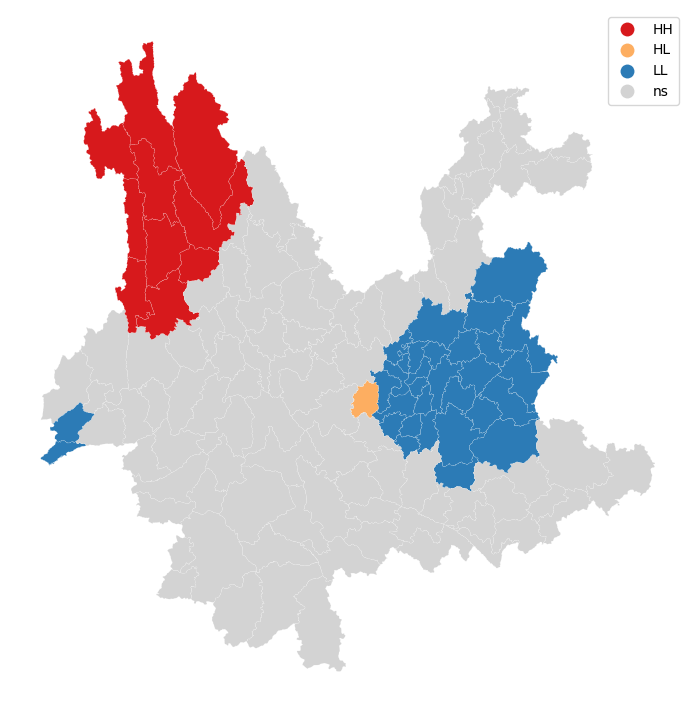

In [11]:
#lisa指数与聚类图
plt=lisa_cluster(moran_local, gdf, p=0.05, figsize = (9,9))
plt